In [33]:
### Problem Statement

# Stark Health Clinic is grappling with the growing challenge of effectively managing and preventing diabetes, a condition that poses severe health risks to patients and significant costs to healthcare systems. Despite efforts to identify at-risk individuals, the current strategies lack the precision necessary for early detection and intervention

### Project Overview
# Stark Health aims to develop a robust diabetes prediction model to accurately identify individuals at risk of developing diabetes. You have been approached as a Data Scientist to lead this project, utilizing advanced machine learning techniques on patient data.

### Project Objective
# The goal is to predict the likelihood of diabetes onset, allowing for timely and targeted preventive measures.
#This initiative will empower ABC Health to enhance patient outcomes, reduce the burden on healthcare resources, and play a proactive role in combating the diabetes epidemic


In [34]:
# Import necessary libraries

# FOR Data Analysis
import pandas as pd
import numpy as np


#FOR Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [35]:
# Load Data
data = pd.read_csv('../data/diabetes_prediction_dataset.csv')
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [36]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [38]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [39]:
# Data cleaning
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [40]:
# checking for duplicates
data.duplicated().sum()

np.int64(3854)

In [41]:
df = data.drop_duplicates()

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<Axes: xlabel='HbA1c_level'>

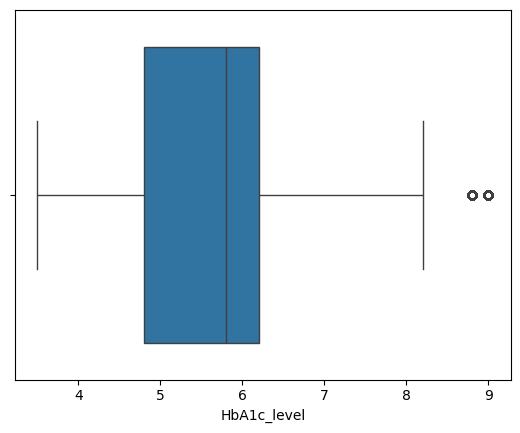

In [44]:
# checking for outliers
sns.boxplot(x=df['HbA1c_level'])

<Axes: xlabel='bmi'>

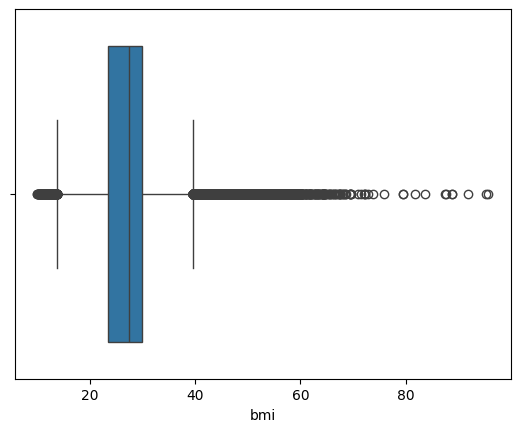

In [45]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='blood_glucose_level'>

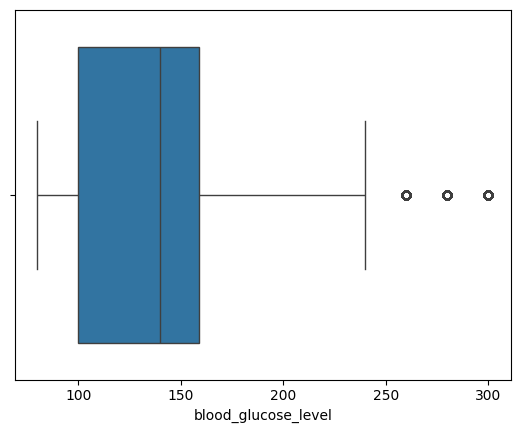

In [46]:
sns.boxplot(x=df['blood_glucose_level'])

In [47]:
# select numerical columns
numerical_columns = df.select_dtypes(include ='number')

In [48]:
len (numerical_columns.columns)

7

In [49]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

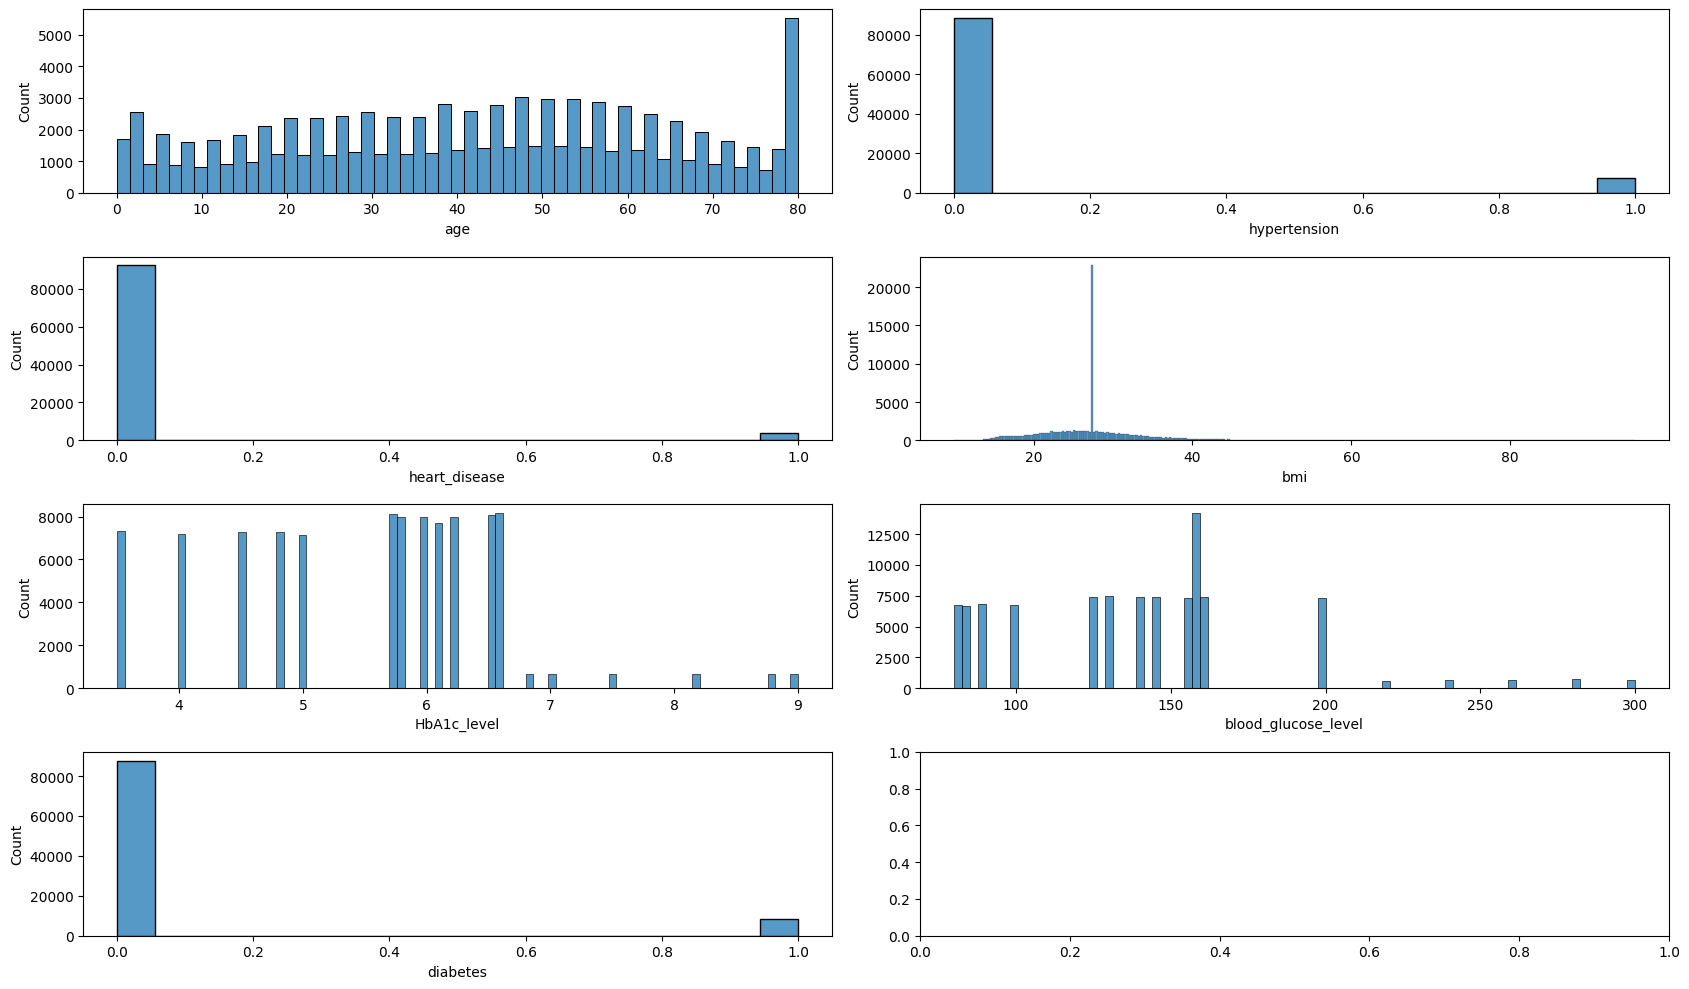

In [50]:
# visualizing numerical columns
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(17,10))
ax = ax.flatten()

for index, column_name in enumerate (numerical_columns):
    sns.histplot(df[column_name], ax= ax[index])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Total Number of Patients')

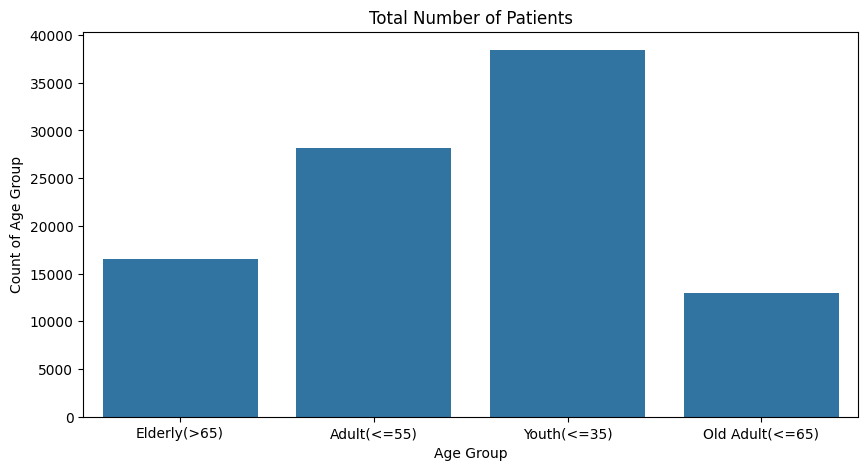

In [51]:
# Age_bracket
def age_bracket(age):
    if age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 65:
        return 'Old Adult(<=65)'
    else :
        return 'Elderly(>65)'

df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10, 5))
sns.countplot(x='age_bracket', data = df)
plt.xlabel('Age Group') 
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

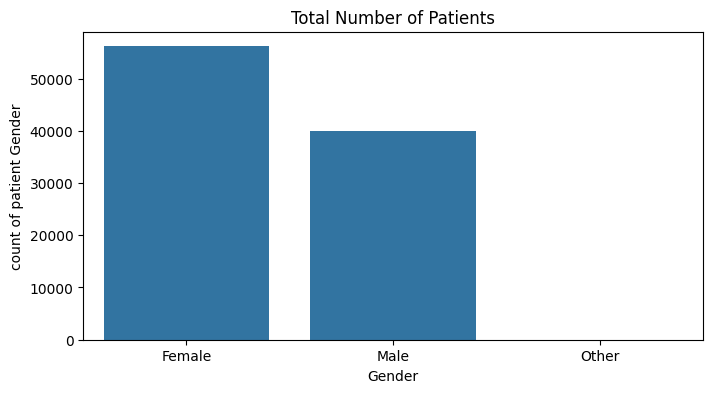

In [52]:
# Data visualization

#Investigating the gender of patients
plt.figure(figsize = (8, 4))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('count of patient Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

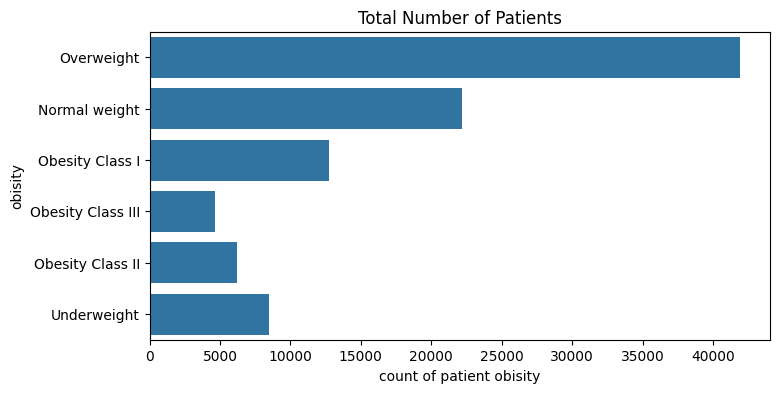

In [53]:
# Data visualization

#Investigating the obisity of patients
def obisity(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal weight"
    elif bmi < 30:
        return "Overweight"
    elif bmi < 35:
        return "Obesity Class I"
    elif bmi < 40:
        return "Obesity Class II"
    else:
        return "Obesity Class III"
        
df['obisity'] = df['bmi'].apply(obisity)

plt.figure(figsize = (8, 4))
sns.countplot(y='obisity', data=df)
plt.ylabel('obisity')
plt.xlabel('count of patient obisity')
plt.title('Total Number of Patients')

In [54]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [55]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket,obisity
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65),Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=55),Overweight


Text(0.5, 1.0, 'Total number of Patients')

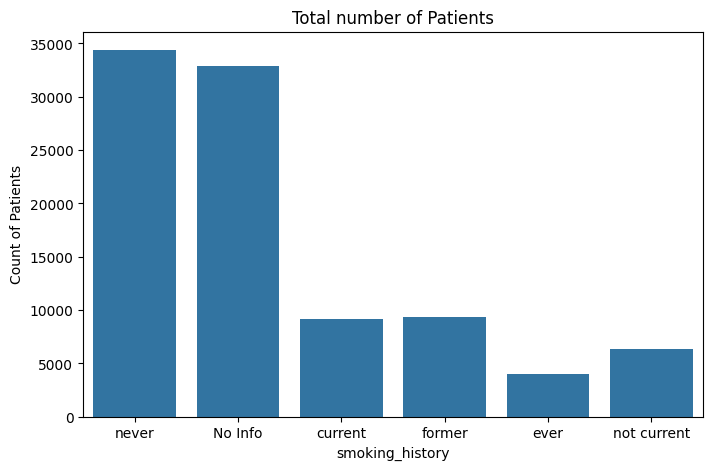

In [56]:
# Data visualization

# Investigate smoking history of patients
plt.figure(figsize =(8, 5))
sns.countplot(x='smoking_history', data = df)
plt.xlabel('smoking_history')
plt.ylabel('Count of Patients')
plt.title('Total number of Patients')  

In [57]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

label
No     87664
Yes     8482
Name: count, dtype: int64


Text(0.5, 1.0, 'Total number of Patients')

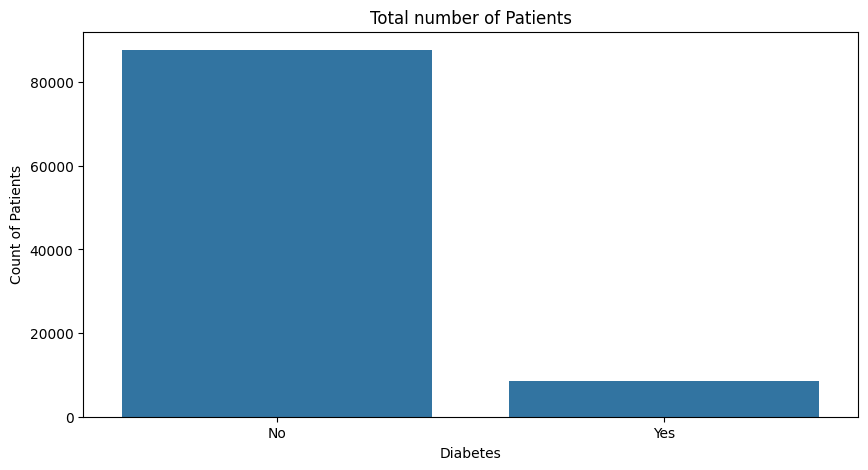

In [58]:
# Data visualization

# target - have disease or not (1=yes, 0=no)
def label(diabetes):
    if diabetes == 1:
        return "Yes"
    else:
        return "No"

df['label'] = df['diabetes']. apply(label)
print (df["label"].value_counts())

# Investigate target of diease
plt.figure(figsize =(10, 5))
sns.countplot(x='label', data = df)
plt.xlabel('Diabetes')
plt.ylabel('Count of Patients')
plt.title('Total number of Patients')       
       

In [59]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_bracket,obisity,label
0,Female,80.0,0,1,never,25.19,6.6,140,0,Elderly(>65),Overweight,No
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Adult(<=55),Overweight,No


Text(0.5, 1.0, 'Total Number of Patients')

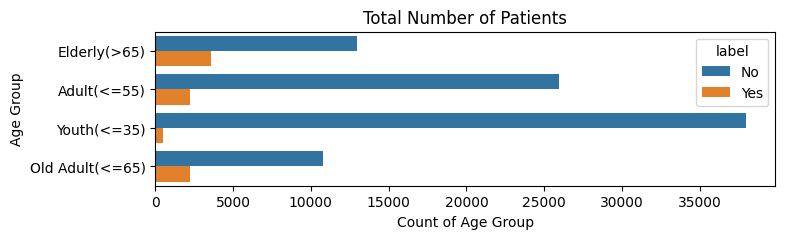

In [60]:
# Bivariate analysis
# Investigating the age group of patients by the target feature

plt.figure(figsize = (8, 2))
sns.countplot(y='age_bracket', data = df, hue ='label')
plt.ylabel('Age Group') 
plt.xlabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

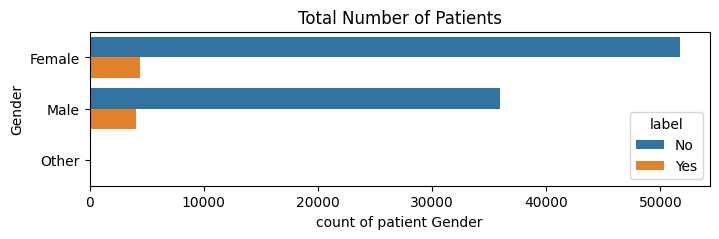

In [61]:
#Investigating the gender of patients by the targer feature 

plt.figure(figsize = (8, 2))
sns.countplot(y='gender', data=df, hue='label')
plt.ylabel('Gender')
plt.xlabel('count of patient Gender')
plt.title('Total Number of Patients')


Text(0.5, 1.0, 'Total Number of Patients')

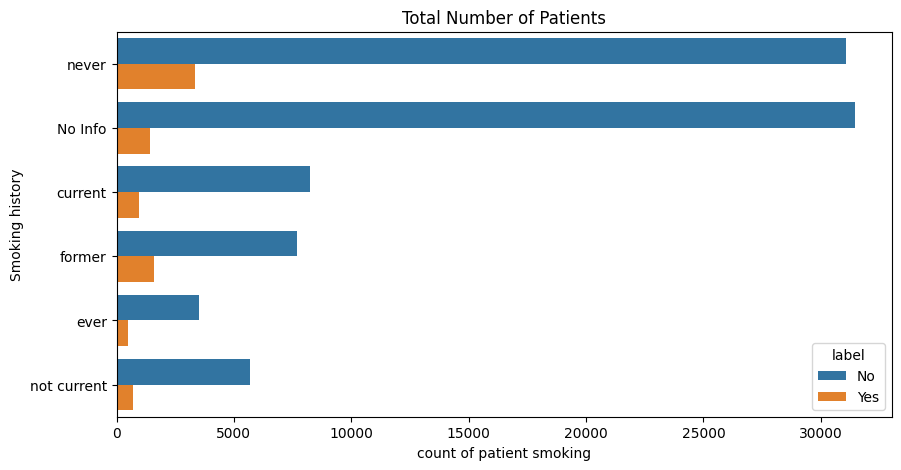

In [62]:
#Investigating the smoking history of patients by the targer feature 

plt.figure(figsize = (10, 5))
sns.countplot(y='smoking_history', data=df, hue='label')
plt.ylabel('Smoking history')
plt.xlabel('count of patient smoking')
plt.title('Total Number of Patients')


In [63]:
correlation_map = numerical_columns.corr()

In [64]:
correlation_map

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


<Axes: >

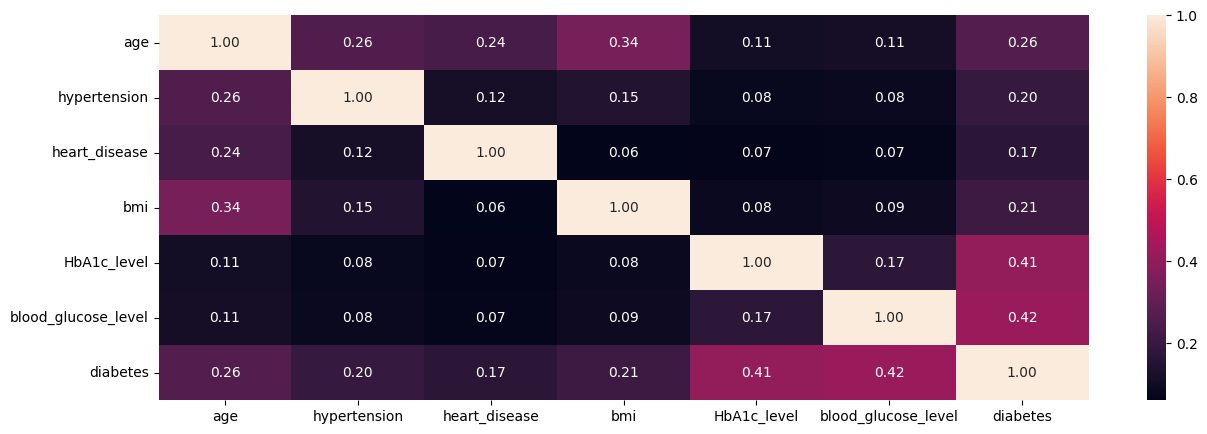

In [65]:
# Multivariate analysis
# correlation visualization

plt.figure(figsize=(15, 5))
sns.heatmap(correlation_map, annot = True, fmt='0.2f')